### Chapter1. Supervised VS Unsupervised learning

##### 1.1 导入所需要的包

In [1]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

%matplotlib inline

##### 1.2 获取数据集

In [2]:
data = datasets.fetch_openml( 
    'mnist_784', 
    version = 1, 
    return_X_y = True,
    parser='auto'
) 
pixel_values, targets = data 
pixel_values = pixel_values.values
targets = targets.astype(int)

In [3]:
# 说明当前数据有7w个784长度的向量，每个向量为28x28的像素图片
pixel_values.shape

(70000, 784)

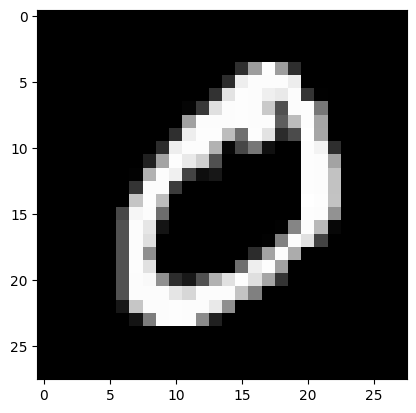

In [8]:
# 显示单一的一张图片
single_image = pixel_values[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray')

##### 1.3 使用t-SNE转换数据

In [5]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [6]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[: 3000])),
    columns = ["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df.head()

,x,y,targets
0,19.767645,-10.649685,5.0
1,55.808681,-0.622938,0.0
2,-1.300089,-53.659470,4.0
3,-40.324917,11.529422,1.0
4,-10.087708,-33.206676,9.0


d:\anaconda3\envs\sklearn\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


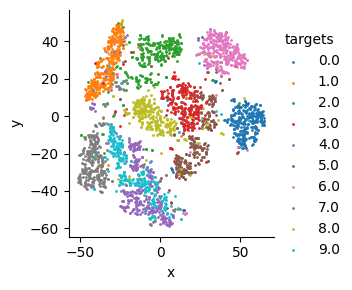

In [12]:
# 可视化转换后的数据
gird = sns.FacetGrid(tsne_df, hue="targets")

gird.map(plt.scatter, "x", "y", s=1).add_legend()

可以看出不同数字被划分成了好几类别